In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Getting set up to export text correctly

If you're exporting text, you need to make sure `matplotlib` is exporting **editable** text, otherwise Illustrator will treat every single character as a shape instead of text. By default `matplotlib` exports "Type 3 fonts" which Adobe Illustrator doesn't understand, so you need to change matplotlib to export **Type 2/TrueType fonts**.

This setting is, for some reason, the number `42`. Run this once at the top of your code and you'll be set for everything else in the script/notebook.

In [2]:
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})

If you don't want to type this all of the time (which you shouldn't), there is a solution! Run the following code **from the command line** - it creates a `matplotlib` startup file that will run the above commands every time `matplotlib` is started. **You can only do this on OS X.**

````bash
mkdir -p ~/.matplotlib
echo 'pdf.fonttype: 42' >> ~/.matplotlib/matplotlibrc
echo 'ps.fonttype: 42' >> ~/.matplotlib/matplotlibrc
````

## Reading in our data

In [3]:
df = pd.read_csv("countries.csv")
df.head()

Country   Continent  GDP_per_capita  life_expectancy  \
0          Afghanistan        Asia             663           54.863   
1              Albania      Europe            4195           74.200   
2              Algeria      Africa            5098           68.963   
3               Angola      Africa            2446           45.234   
4  Antigua and Barbuda  N. America           12738           73.544   

   Population  
0    22856302  
1     3071856  
2    30533827  
3    13926373  
4       77656

## Exporting

**Be sure to read the section above above about exporting text.**

After you make your graphic, use `plt.savefig("filename.pdf")` to save it as a vector-graphic `.pdf`. Do not save as `png` or `jpg` or anythign else. You *could* save as `svg` but I've found `pdf` generally works better.

You'll also need to pass `transparent=True` when using `.savefig` to get rid of white backgrounds. It makes your file much easier to work with in Illustrator. 

Even though it's just `plt.savefig` again and again, I've included several examples below.

## Example 1, bar chart

Setting `color='slategray'` allows you to make every bar be the same color. `plt.savefig` is the bit that saves your graph.

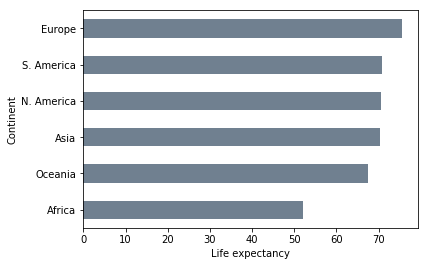

In [4]:
ax = df.groupby("Continent")['life_expectancy'].median().sort_values().plot(kind='barh', color='slategray')
ax.set_xlabel("Life expectancy")

# Remember: transparent=True
plt.savefig("output-bargraph.pdf", transparent=True)

# Example 2, scatterplot

Here I've passed a lot of arguments in to the `.scatter` method. It's still `plt.savefig` to save, though.

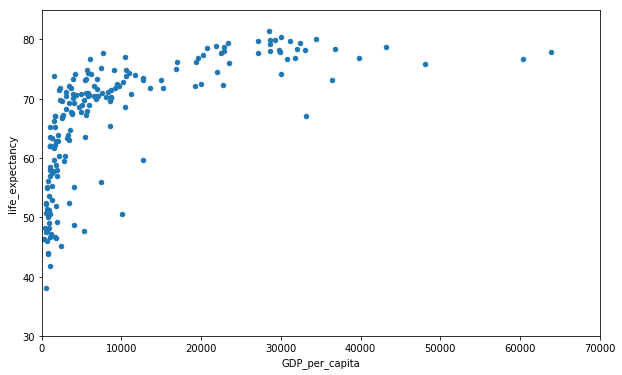

In [6]:
df.plot(kind='scatter', x='GDP_per_capita', y='life_expectancy', xlim=(0, 70000), ylim=(30, 85), figsize=(10, 6))
plt.savefig("output-scatter.pdf", transparent=True)

## Example 3, grouped scatterplot

Setting `markeredgewidth=0` allows you to easily remove the invisible borders around the circles when in Illustrator.

But despite it being crazy complicated: `plt.savefig` once again.

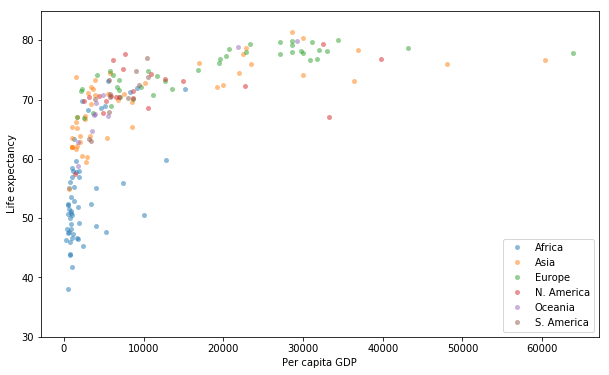

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
for name, group in df.groupby('Continent'):
    group.plot(x='GDP_per_capita', y='life_expectancy', marker='o', markersize=5, alpha=0.5, linestyle='', label=name, markeredgewidth=0, ax=ax)

ax.set_ylabel("Life expectancy")
ax.set_xlabel("Per capita GDP")
ax.set_ylim((30,85))
ax.legend(loc='lower right')

# Remember: transparent=True
plt.savefig("output-scatter-grouped.pdf", transparent=True)